# ***QUESTION 1***

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58736 entries, 0 to 191252
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    58736 non-null  int64  
 1   location_id    58736 non-null  int64  
 2   page_url       58736 non-null  object 
 3   property_type  58736 non-null  object 
 4   price          58736 non-null  int64  
 5   location       58736 non-null  object 
 6   city           58736 non-null  object 
 7   province_name  58736 non-null  object 
 8   latitude       58736 non-null  float64
 9   longitude      58736 non-null  float64
 10  baths          58736 non-null  int64  
 11  area           58736 non-null  object 
 12  purpose        58736 non-null  object 
 13  bedrooms       58736 non-null  int64  
 14  date_added     58736 non-null  object 
 15  agency         45606 non-null  object 
 16  agent          45605 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage:

<ipython-input-4-f6be3d5e3dc7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[['baths', 'bedrooms']] = imputer.fit_transform(df_city[['baths', 'bedrooms']])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-4-f6be3d5e3dc7>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[['baths', 'bedrooms']] = scaler.fit_transform(df_city[['baths', 'bedrooms']])

Correlation Matrix:
             property_id  location_id     price  latitude  longitude  \
property_id     1.000000    -0.071051 -0.039703 -0.103612  -0.045077   
location_id    -0.071051     1.000000 -0.126249  0.155932   0.031275   
price          -0.039703    -0.126249  1.000000  0.000264   0.131782   
latitude       -0.103612     0.155932  0.000264  1.000000   0.415984   
longitude      -0.045077     0.031275  0.131782  0.415984   1.000000   
baths          -0.056410    -0.153430  0.248071 -0.163005   0.051446   
bedrooms        0.034879    -0.156826  0.276977 -0.065881   0.054220   

                baths  bedrooms  
property_id -0.056410  0.034879  
location_id -0.153430 -0.156826  
price        0.248071  0.276977  
latitude    -0.163005 -0.065881  
longitude    0.051446  0.054220  
baths        1.000000  0.682387  
bedrooms     0.682387  1.000000  


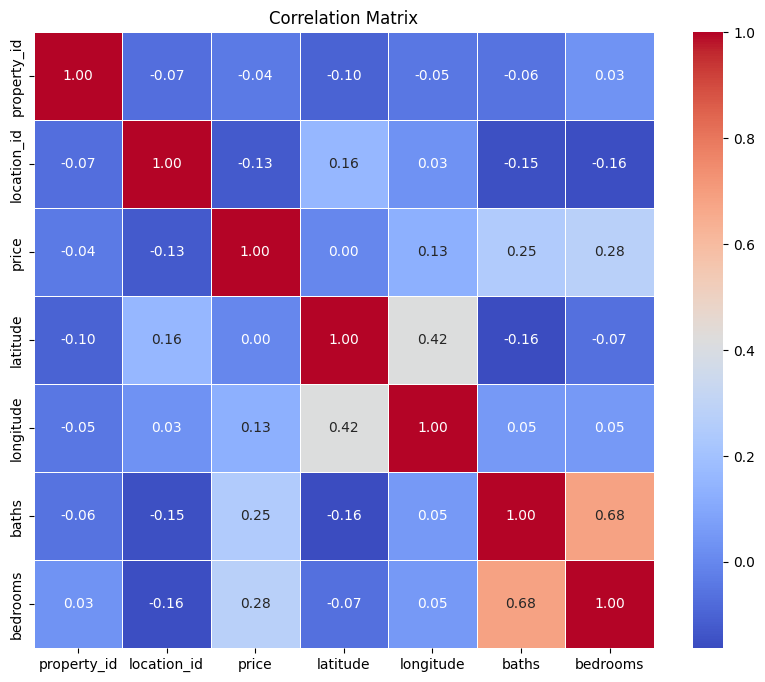

Correlation between Number of Properties and Average Property Price:
             property_id     price
property_id     1.000000 -0.039703
price          -0.039703  1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Mean Absolute Error: 13400034.32057477
Mean Squared Error: 984929214115669.4
Root Mean Squared Error: 31383581.919782028
Mean Absolute Percentage Error: 88.81639455127217

Metrics with Lasso Regression (Feature Selection):
Mean Absolute Error: 13400034.32057477
Mean Squared Error: 984929214115669.4
Root Mean Squared Error: 31383581.919782028
Mean Absolute Percentage Error: 88.81639455127217


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
# Load the dataset
dataset_path = 'Q1_property - Q1_property.csv'
df = pd.read_csv('/Q1_property - Q1_property.csv')

chosen_city = 'Lahore'
df_city = df[df['city'] == chosen_city]

# Data exploration
print(df_city.info())
print(df_city.describe())

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_city[['baths', 'bedrooms']] = imputer.fit_transform(df_city[['baths', 'bedrooms']])

# Handle outliers using Isolation Forest
outlier_model = IsolationForest(contamination=0.05)
outliers = outlier_model.fit_predict(df_city[['baths', 'bedrooms']])
df_city = df_city.loc[outliers == 1]  # Keep only inliers

# Feature scaling
scaler = StandardScaler()
df_city[['baths', 'bedrooms']] = scaler.fit_transform(df_city[['baths', 'bedrooms']])

# Split the data into training and testing sets
X = df_city[['baths', 'bedrooms']]
y = df_city['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Exploratory Data Analysis (EDA)
correlation_matrix = df_city.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Correlation between the number of properties listed and average property price
correlation_listings_price = df_city[['property_id', 'price']].corr()
print("Correlation between Number of Properties and Average Property Price:")
print(correlation_listings_price)

# Compute price per square meter
df_city['area'] = pd.to_numeric(df_city['area'], errors='coerce')

# Handle missing values in 'area'
df_city['area'] = df_city['area'].fillna(df_city['area'].mean())

# Now, perform the division
df_city['price_per_sqm'] = df_city['price'] / df_city['area']

# Feature Engineering
# Compute price per square meter
df_city['price_per_sqm'] = df_city['price'] / df_city['area']

# Derive temporal features from the date_added column
df_city['date_added'] = pd.to_datetime(df_city['date_added'])
df_city['month'] = df_city['date_added'].dt.month
df_city['quarter'] = df_city['date_added'].dt.quarter
df_city['day_of_week'] = df_city['date_added'].dt.dayofweek

# Standardize numerical variables
numerical_cols = ['baths', 'bedrooms', 'area', 'property_id', 'price', 'price_per_sqm']
df_city[numerical_cols] = StandardScaler().fit_transform(df_city[numerical_cols])

# Encode categorical variables (assuming 'agency' is a categorical variable)
df_city = pd.get_dummies(df_city, columns=['agency'], drop_first=True)

# Eliminate unnecessary columns
unnecessary_cols = ['date_added']  # Add other unnecessary columns if needed
df_city = df_city.drop(unnecessary_cols, axis=1)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = regression_model.predict(X_test)

# Model evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Display the metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)


#BONUS

# Train Lasso Regression model with cross-validation for feature selection
lasso_model = LassoCV(cv=5)  # 5-fold cross-validation
lasso_model.fit(X_train, y_train)

# Selected features based on non-zero coefficients
selected_features = X_train.columns[lasso_model.coef_ != 0]

# Subset the data with selected features
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]

# Retrain your regression model on the selected features
regression_model_lasso = LinearRegression()  # Replace with your regression model
regression_model_lasso.fit(X_train_lasso, y_train)

# Evaluate the model performance with the reduced feature set
y_pred_lasso = regression_model_lasso.predict(X_test_lasso)

# Model evaluation metrics with reduced feature set
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)

# Display the metrics with reduced feature set
print("\nMetrics with Lasso Regression (Feature Selection):")
print("Mean Absolute Error:", mae_lasso)
print("Mean Squared Error:", mse_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("Mean Absolute Percentage Error:", mape_lasso)



# ***QUESTION 2:***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


dataset_path = 'Company_Data.csv'
df = pd.read_csv('/Q2_Fraud_check.csv')

# Categorical Variable Handling
df = pd.get_dummies(df, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

# Target Variable Transformation
df['Taxable.Income'] = df['Taxable.Income'].apply(lambda x: 0 if x <= 30000 else 1)

# Feature Scaling
scaler = MinMaxScaler()
df[['Work.Experience', 'City.Population']] = scaler.fit_transform(df[['Work.Experience', 'City.Population']])

# Split the data into features (X) and target variable (y)
X = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Model Evaluation
y_pred = dt_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Model Improvement (Hyperparameter Tuning)
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearch
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Improved Model Evaluation
y_pred_improved = grid_search.predict(X_test)
classification_rep_improved = classification_report(y_test, y_pred_improved)
print("\nImproved Classification Report:\n", classification_rep_improved)


Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.15      0.17        26
           1       0.78      0.81      0.79        94

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Improved Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      0.99      0.87        94

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120

